# Part 2 EDA

In [145]:
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
import plotly.express as px


In [2]:
# Import Metadata
metadata = pd.read_csv('Cleaned Data CSVs/weather_stations_list.csv')

metadata.head()

,station_id,name,latitude,longitude,elevation,country,provider
0,2979,Cap_ferrat,43.68333,7.32367,138,France,FR_METEOFRANCE
1,2978,Les_orres_fontaines,44.47567,6.55767,1895,France,FR_METEOFRANCE
2,2977,Broc,46.60966,7.10816,682,Switzerland,CH_METEOSWISS
3,2976,Mesocco,46.39560,9.23108,825,Switzerland,CH_METEOSWISS
4,2975,Dischingen_Eglingen,48.71340,10.44050,550,Germany,DE_DWD


In [3]:
# Import Station Data 
station_data = pd.read_csv('Cleaned Data CSVs/monthly_snowpack.csv')

station_data.head()

,id,station_id,year,month,hnsum
0,371401,2249,1996,3,39.0
1,371402,2249,1997,1,99.0
2,371403,2249,1997,2,22.0
3,371404,2249,1997,3,7.0
4,371405,2249,1998,1,84.0


In [62]:
# station_data.describe()
print('Station Data Info')
print(station_data.info())
print('')

print(f'Station Data Shape {station_data.shape}')

print(f'Number Of Unique Entries = {station_data['id'].nunique()} ')

Station Data Info
<class 'pandas.core.frame.DataFrame'>
Index: 1027301 entries, 0 to 1500099
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1027301 non-null  int64  
 1   station_id  1027301 non-null  int64  
 2   year        1027301 non-null  int64  
 3   month       1027301 non-null  int64  
 4   hnsum       1027301 non-null  float64
 5   winter      1027301 non-null  bool   
dtypes: bool(1), float64(1), int64(4)
memory usage: 48.0 MB
None

Station Data Shape (1027301, 6)
Number Of Unique Entries = 1027301 


In [5]:
# Drop Null Values
station_data = station_data.dropna()

station_data.describe(include='all')


,id,station_id,year,month,hnsum
count,1.027301e+06,1.027301e+06,1.027301e+06,1.027301e+06,1.027301e+06
mean,1.068072e+06,1.489530e+03,1.990848e+03,6.405561e+00,1.941337e+01
std,4.381786e+05,8.584716e+02,1.802231e+01,3.521692e+00,3.985992e+01
min,3.714010e+05,1.000000e+00,1.864000e+03,1.000000e+00,0.000000e+00
25%,6.808710e+05,7.560000e+02,1.980000e+03,3.000000e+00,0.000000e+00
50%,1.045491e+06,1.494000e+03,1.993000e+03,6.000000e+00,0.000000e+00
75%,1.404724e+06,2.235000e+03,2.004000e+03,1.000000e+01,2.100000e+01
max,1.871500e+06,2.979000e+03,2.020000e+03,1.200000e+01,8.270000e+02


In [6]:
station_data.head()

,id,station_id,year,month,hnsum
0,371401,2249,1996,3,39.0
1,371402,2249,1997,1,99.0
2,371403,2249,1997,2,22.0
3,371404,2249,1997,3,7.0
4,371405,2249,1998,1,84.0


In [7]:
# Assess 'Winter Months' between November - April

station_data['winter'] = station_data['month'].isin([11, 12, 1, 2, 3, 4])

# Validate new column values

print('Number Of Winter Month Records = ',sum(station_data[station_data['winter']==True].value_counts()))

print('Number Of Summer Month Records =',sum(station_data[station_data['winter']==False].value_counts()))

print('Total Number Of Records = ',station_data.value_counts().sum())

Number Of Winter Month Records =  541578
Number Of Summer Month Records = 485723
Total Number Of Records =  1027301


In [109]:
# Assess quantities of Snowpack recordings per year

Annual_Recordings = station_data[station_data['winter']==True].groupby('year')['id'].count().reset_index()
Annual_Recordings

,year,id
0,1864,20
1,1865,33
2,1866,33
3,1867,34
4,1868,27
...,...,...
152,2016,9067
153,2017,6209
154,2018,6028
155,2019,3384


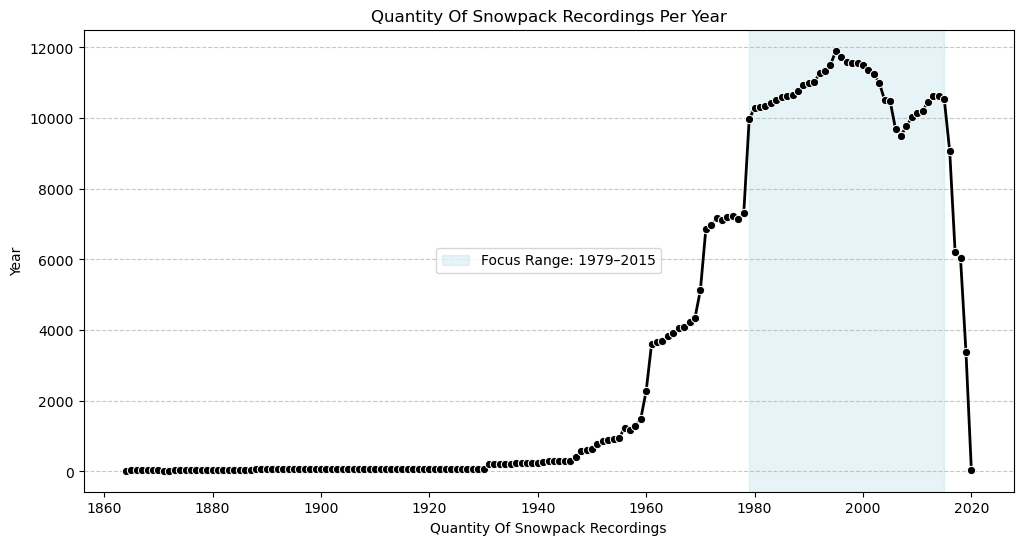

In [ ]:
# Visualise quantities of Snowpack recordings per year


# Line Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=Annual_Recordings, x='year', y='id',marker='o', linewidth=2, color='black')

plt.axvspan(1979, 2015, color='lightblue', alpha=0.3, label='Focus Range: 1979–2015')
plt.legend(loc='center')

plt.title('Quantity Of Snowpack Recordings Per Year')
plt.ylabel('Quantity Of Snowpack Recordings')
plt.xlabel('Year')
plt.grid(True, axis='y',linestyle='--', alpha=0.7)
# plt.tight_layout()
plt.show()



In [114]:
focus_range = np.arange(1979,2016)
snow_recordings = station_data[(station_data['year'].isin(focus_range)) & (station_data['winter'] == True)]
snow_recordings = snow_recordings.reset_index(drop=True)

# snow_recordings.groupby('year')['year'].count()
pd.DataFrame(snow_recordings)
snow_recordings


,id,station_id,year,month,hnsum,winter
0,371401,2249,1996,3,39.0,True
1,371402,2249,1997,1,99.0,True
2,371403,2249,1997,2,22.0,True
3,371404,2249,1997,3,7.0,True
4,371405,2249,1998,1,84.0,True
...,...,...,...,...,...,...
397602,1871481,1692,2015,2,69.0,True
397603,1871482,1692,2015,3,3.0,True
397604,1871483,1692,2015,4,0.0,True
397605,1871488,1692,2015,11,37.0,True


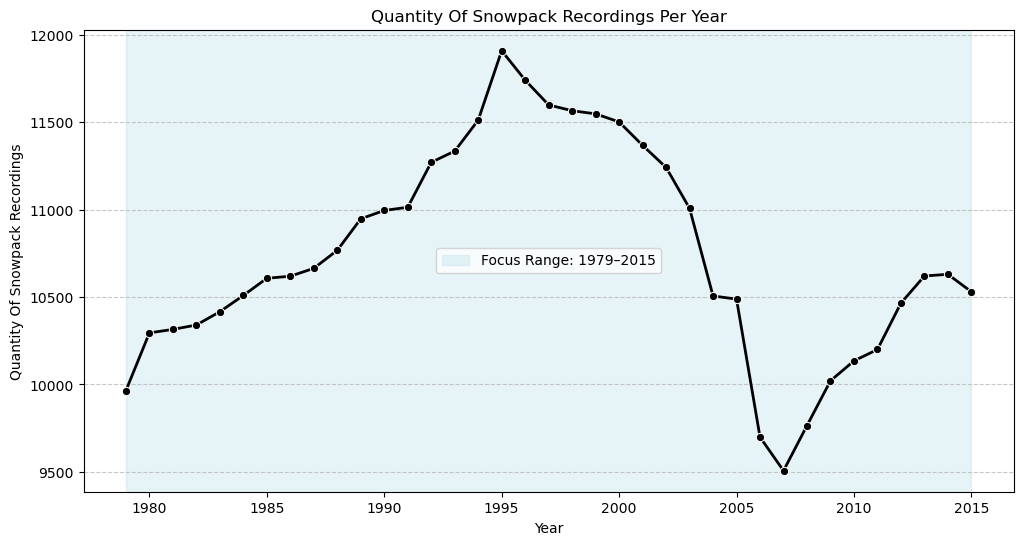

In [120]:
yearly_counts = snow_recordings.groupby('year').size().reset_index(name='count')

# Line Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_counts, x='year', y='count',marker='o', linewidth=2, color='black')

plt.axvspan(1979, 2015, color='lightblue', alpha=0.3, label='Focus Range: 1979–2015')
plt.legend(loc='center')

plt.title('Quantity Of Snowpack Recordings Per Year')
plt.ylabel('Quantity Of Snowpack Recordings')
plt.xlabel('Year')
plt.grid(True, axis='y',linestyle='--', alpha=0.7)
# plt.tight_layout()
plt.show()


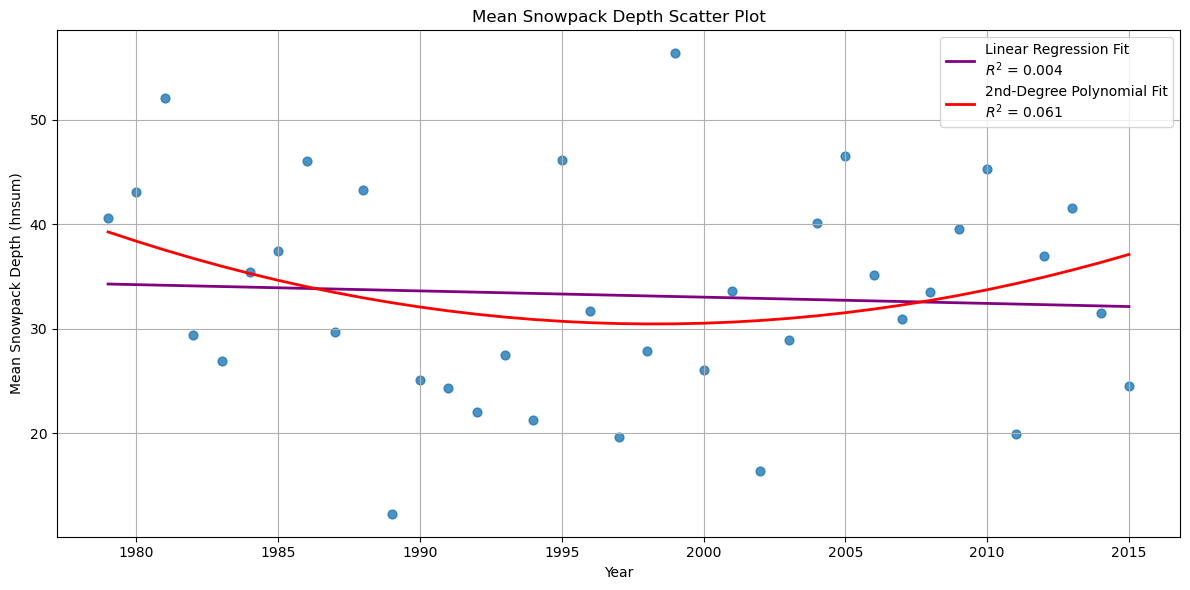

In [177]:
# Create Variables
mean_snow = snow_recordings.groupby('year')['hnsum'].mean().reset_index()
x = mean_snow['year'].values
y = mean_snow['hnsum'].values

# Produce Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(mean_snow['year'], mean_snow['hnsum'])

    # Predict y values
y_pred = slope * x + intercept



# Produce a 2nd-degree Polynomial Regression
from numpy.polynomial.polynomial import Polynomial
coefs = np.polyfit(x, y, deg=2)
poly = np.poly1d(coefs)

    # Model Evaluation
from sklearn.metrics import r2_score
    # Formula r2 score
y_pred_poly = poly(x)
r2 = r2_score(y, y_pred_poly)



# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(x,mean_snow['hnsum'], alpha=0.8, s=40)
# Linear Regression Plot
plt.plot(x, y_pred, color='purple', linewidth=2, label=f'Linear Regression Fit\n$R^2$ = {r_value**2:.3f}')
# Polynomial Regresion Plot
plt.plot(x, y_pred_poly, color='red', linewidth=2, label=f'2nd-Degree Polynomial Fit\n$R^2$ = {r2:.3f}')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Mean Snowpack Depth (hnsum)')
plt.title('Mean Snowpack Depth Scatter Plot')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

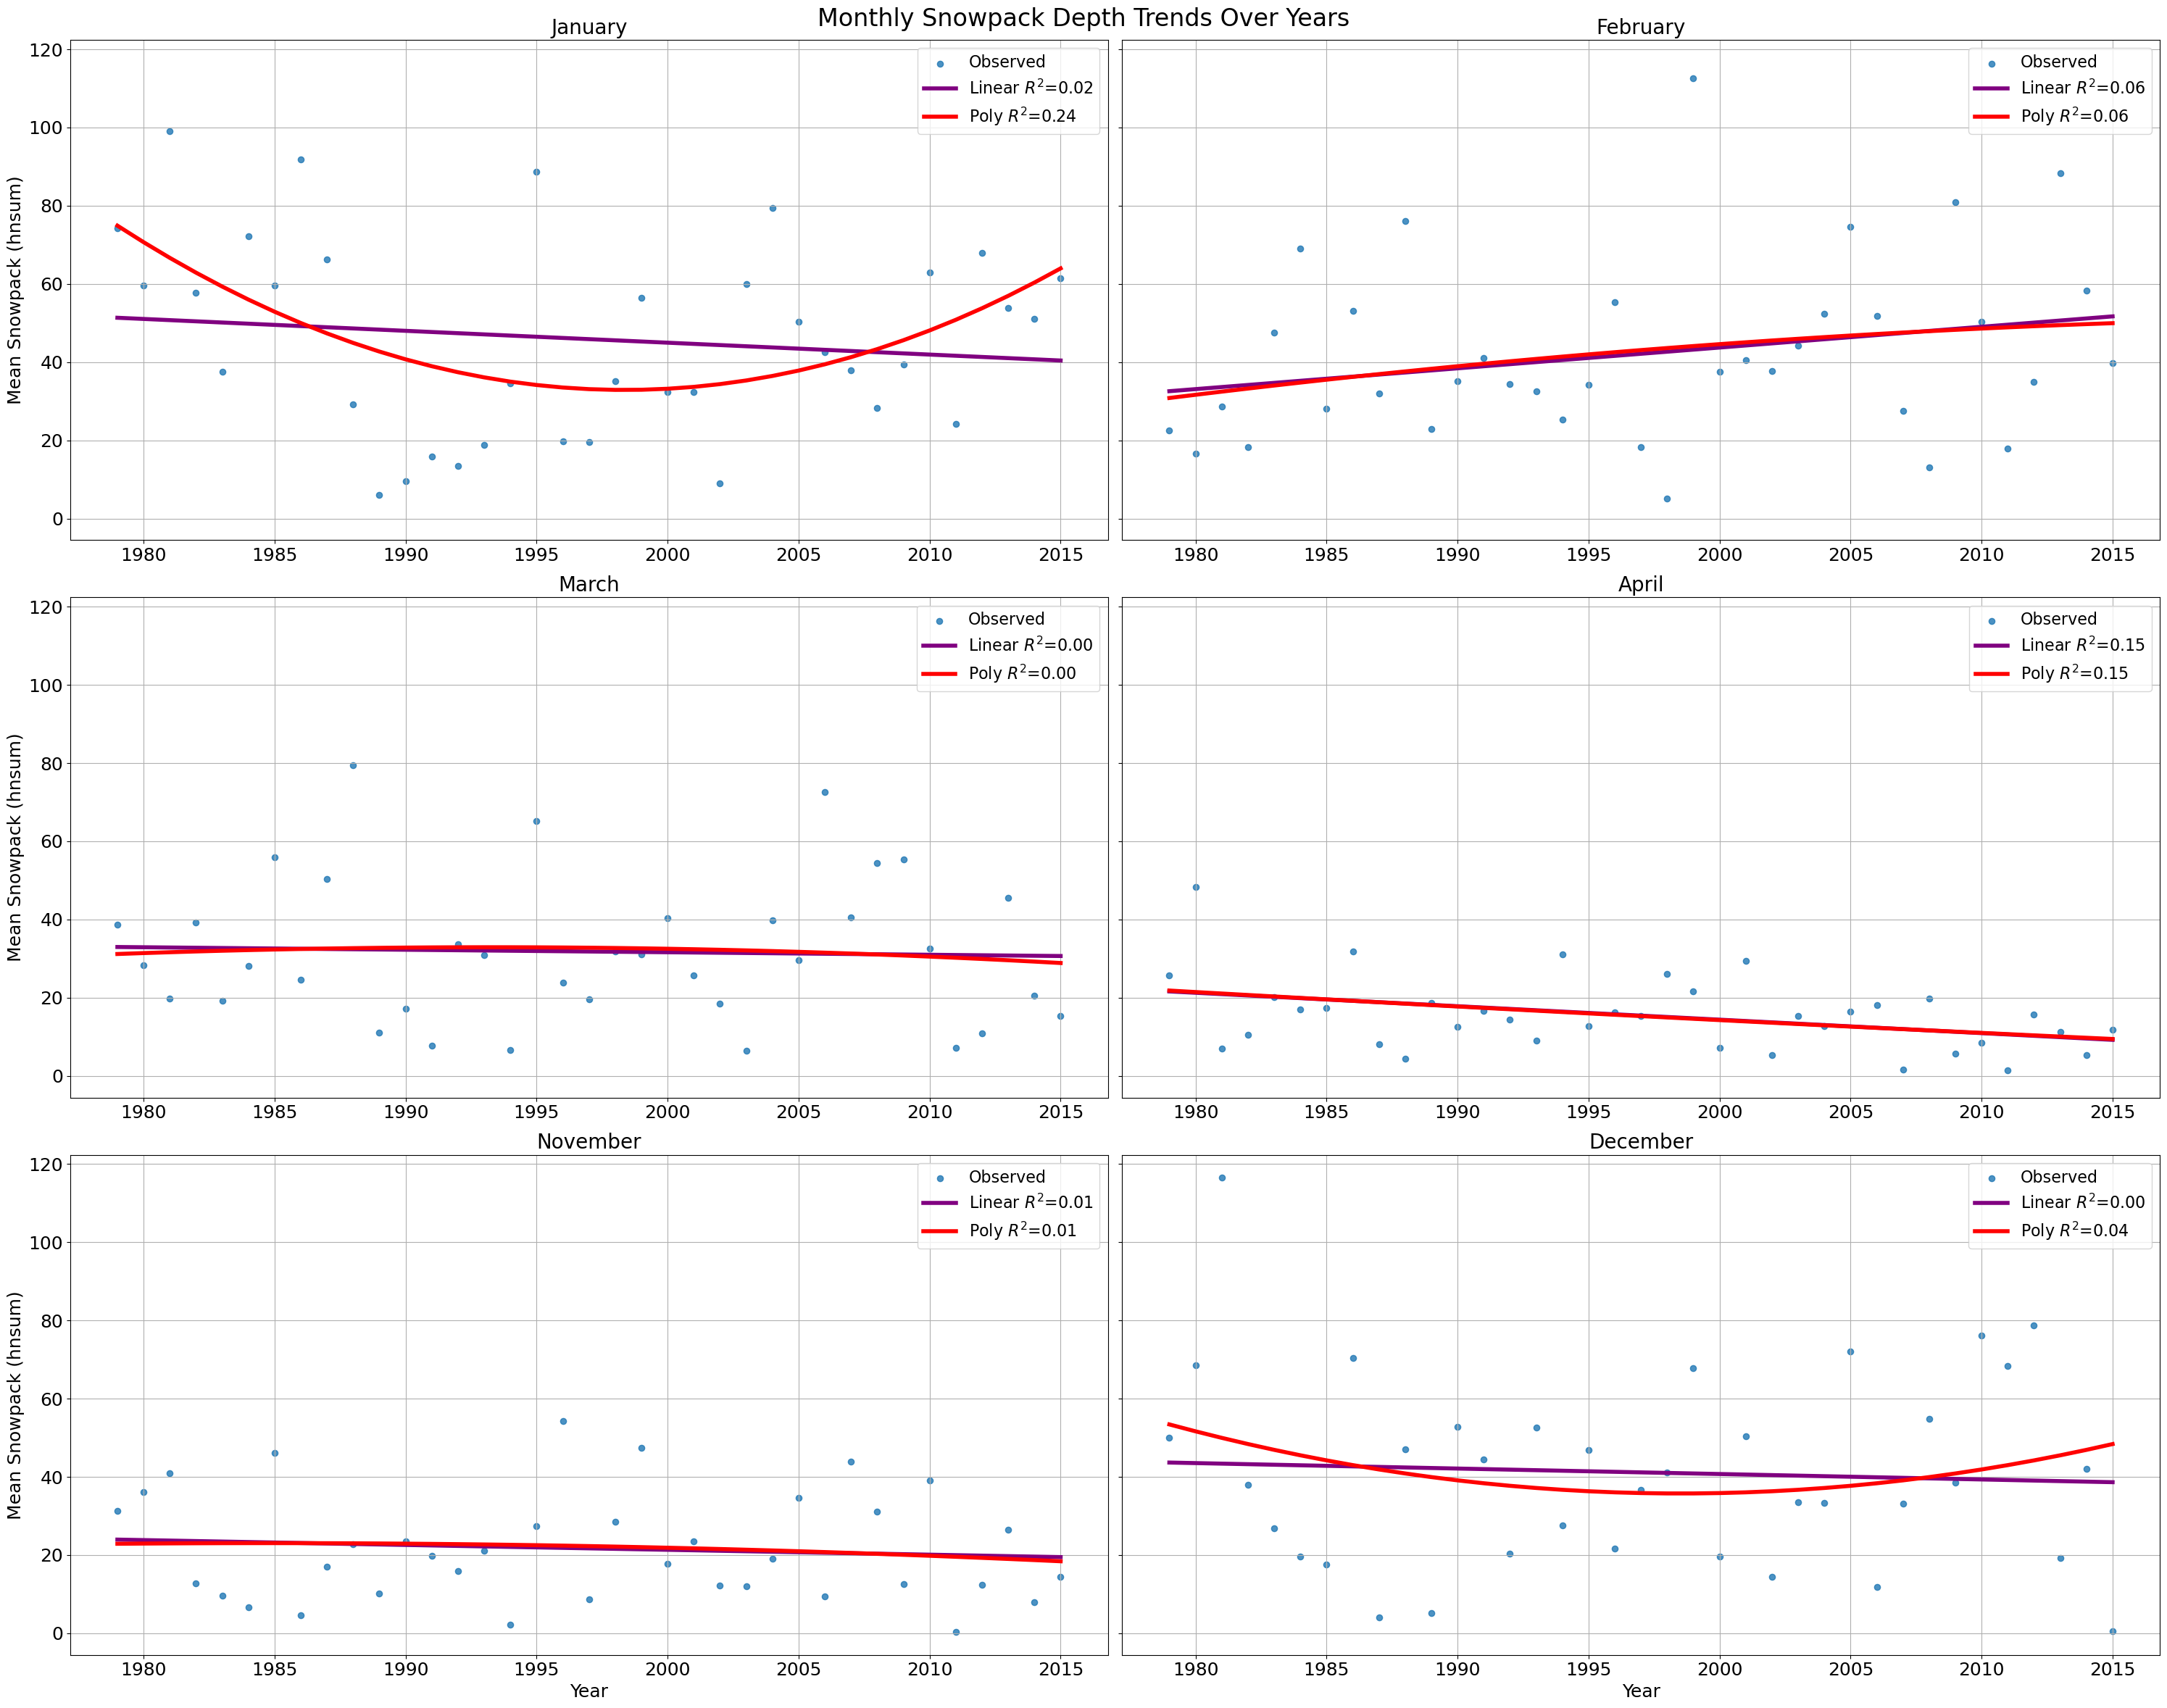

In [213]:
# Create Variables
monthly_avg = snow_recordings.groupby(['year', 'month'])['hnsum'].mean().reset_index()

x = mean_snow['year'].values
y = mean_snow['hnsum'].values

fig, axes = plt.subplots(3, 2, figsize=(30, 24), sharey=True)
fig.suptitle('Monthly Snowpack Depth Trends Over Years', fontsize=24)

# Month names for labeling
month_labels = ['January', 'February', 'March', 'April', 'November', 'December']

for i, month in enumerate([1,2,3,4,11,12]):
    ax = axes[i // 2, i % 2]
    month_data = monthly_avg[monthly_avg['month'] == month]

    x = month_data['year'].values
    y = month_data['hnsum'].values

    # Linear Regression
    slope, intercept, r_val, _, _ = linregress(x, y)
    y_pred = slope * x + intercept
    r2 = r_val ** 2

    # Polynomial Regression
    coefs = np.polyfit(x, y, deg=2)
    poly = np.poly1d(coefs)
    y_poly = poly(x)
    r2_poly = r2_score(y, y_poly)

    # Scatter and lines
    ax.scatter(x, y, s=35, alpha=0.8, label='Observed')
    ax.plot(x, y_pred, color='purple', linewidth=4,
            label=f'Linear $R^2$={r2:.2f}')
    ax.plot(x, y_poly, color='red', linewidth=4,
            label=f'Poly $R^2$={r2_poly:.2f}')

    ax.set_title(month_labels[i], fontsize=20)
    ax.grid(True)
    if i % 2 == 0:
        ax.set_ylabel('Mean Snowpack (hnsum)',fontsize=18)
    if i // 2 == 2:
        ax.set_xlabel('Year',fontsize=18)
    ax.legend(fontsize=16)
    ax.tick_params(axis='both', labelsize=18)

plt.tight_layout()
plt.show()


In [ ]:
# Identify Weather Stations In European Alps



# Create Plotly map
fig = px.scatter_map(
    metadata,
    lat='latitude',
    lon='longitude',
    hover_name='name',
    hover_data=['elevation', 'country', 'provider'],
    color='country',  # Optional: color by country
    size_max=10,
    zoom=5,
    height=600
)

# Set Mapbox style
fig.update_layout(mapbox_style='open-street-map')  # or try 'carto-positron', 'stamen-terrain', etc.

# Add title
fig.update_layout(title='Weather Stations in European Alps')

fig.show()
